In [ ]:
import pandas as pd
import io

csv_data = """
Run order,Temperature (°C),Time (h),pH,Methanol conc (g/L),Glucose conc (g/L),Observed citric acid yield (g/L),Predicted citric acid yield (g/L),Residuals (g/L)
1,25,10,5,24,3,12.33,12.30,0.03
2,30,40,6,60,4,11.77,11.73,0.04
3,30,40,3,60,7,12.20,11.77,0.43
4,30,110,3,60,4,10.36,10.19,0.17
5,30,30,3,60,4,10.28,10.21,0.07
6,40,40,3,60,4,13.18,11.91,1.27
7,25,80,2,96,6,12.97,12.71,0.26
8,25,10,2,96,3,13.28,13.50,-0.22
9,25,10,2,24,6,10.31,10.40,-0.10
10,35,80,5,96,6,10.23,9.73,0.50
11,25,80,5,24,6,12.38,12.31,0.07
12,30,40,0,60,4,12.10,12.12,-0.02
13,35,80,2,24,6,11.20,11.35,-0.15
14,25,80,2,24,3,14.29,14.05,0.25
15,30,40,3,60,1,12.66,12.42,0.24
16,35,10,2,24,3,11.69,11.77,-0.08
17,30,40,3,72,4,15.51,15.54,-0.03
18,35,80,2,96,3,12.74,12.87,-0.13
19,25,10,5,96,6,10.08,11.74,-1.67
20,20,40,3,60,4,10.26,10.55,-0.29
21,35,10,5,96,3,10.36,10.12,0.24
22,30,40,3,12,4,11.13,10.87,0.26
23,35,10,2,96,6,10.92,11.11,-0.18
24,30,40,3,60,4,10.46,11.08,-0.62
25,25,80,5,96,3,10.33,10.44,-0.11
26 ,35 ,10 ,5 ,24 ,6 ,13.02 ,13.06 ,-0.04
27 ,35 ,80 ,5 ,24 ,3 ,10.49 ,10.67 ,-0.18
"""

# Use io.StringIO to treat the string as a file
df = pd.read_csv(io.StringIO(csv_data))

# Display the resulting DataFrame
print(df)

    Run order  Temperature (°C)  Time (h)  pH  Methanol conc (g/L)  \
0           1                25        10   5                   24   
1           2                30        40   6                   60   
2           3                30        40   3                   60   
3           4                30       110   3                   60   
4           5                30        30   3                   60   
5           6                40        40   3                   60   
6           7                25        80   2                   96   
7           8                25        10   2                   96   
8           9                25        10   2                   24   
9          10                35        80   5                   96   
10         11                25        80   5                   24   
11         12                30        40   0                   60   
12         13                35        80   2                   24   
13         14       

In [ ]:
X = df.drop(["Predicted citric acid yield (g/L)"],axis= 1)
y = df["Observed citric acid yield (g/L)"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Run order                         27 non-null     int64  
 1   Temperature (°C)                  27 non-null     int64  
 2   Time (h)                          27 non-null     int64  
 3   pH                                27 non-null     int64  
 4   Methanol conc (g/L)               27 non-null     int64  
 5   Glucose conc (g/L)                27 non-null     int64  
 6   Observed citric acid yield (g/L)  27 non-null     float64
 7   Residuals (g/L)                   27 non-null     float64
dtypes: float64(2), int64(6)
memory usage: 1.8 KB


In [ ]:
X.describe()

,Run order,Temperature (°C),Time (h),pH,Methanol conc (g/L),Glucose conc (g/L),Observed citric acid yield (g/L),Residuals (g/L)
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.00000
mean,14.000000,30.000000,45.185185,3.296296,58.666667,4.296296,11.723333,0.00037
std,7.937254,4.803845,30.555167,1.462738,29.830289,1.462738,1.427607,0.47407
min,1.000000,20.000000,10.000000,0.000000,12.000000,1.000000,10.080000,-1.67000
25%,7.500000,25.000000,10.000000,2.000000,24.000000,3.000000,10.360000,-0.14000
50%,14.000000,30.000000,40.000000,3.000000,60.000000,4.000000,11.690000,-0.02000
75%,20.500000,35.000000,80.000000,5.000000,96.000000,6.000000,12.700000,0.24000
max,27.000000,40.000000,110.000000,6.000000,96.000000,7.000000,15.510000,1.27000


Text(0.5, 1.0, 'temp vs y')

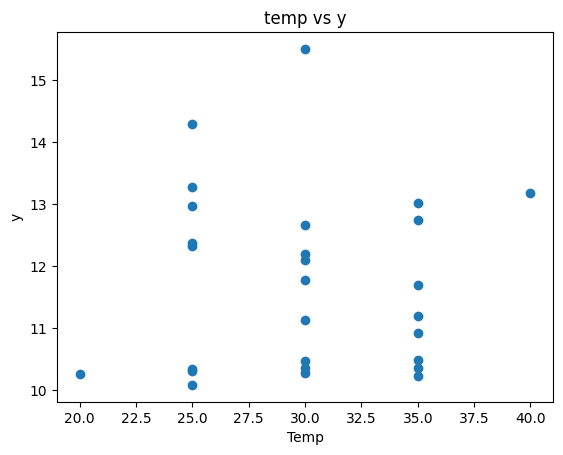

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X['Temperature (°C)'] , y)
plt.xlabel("Temp")
plt.ylabel("y")
plt.title("temp vs y")

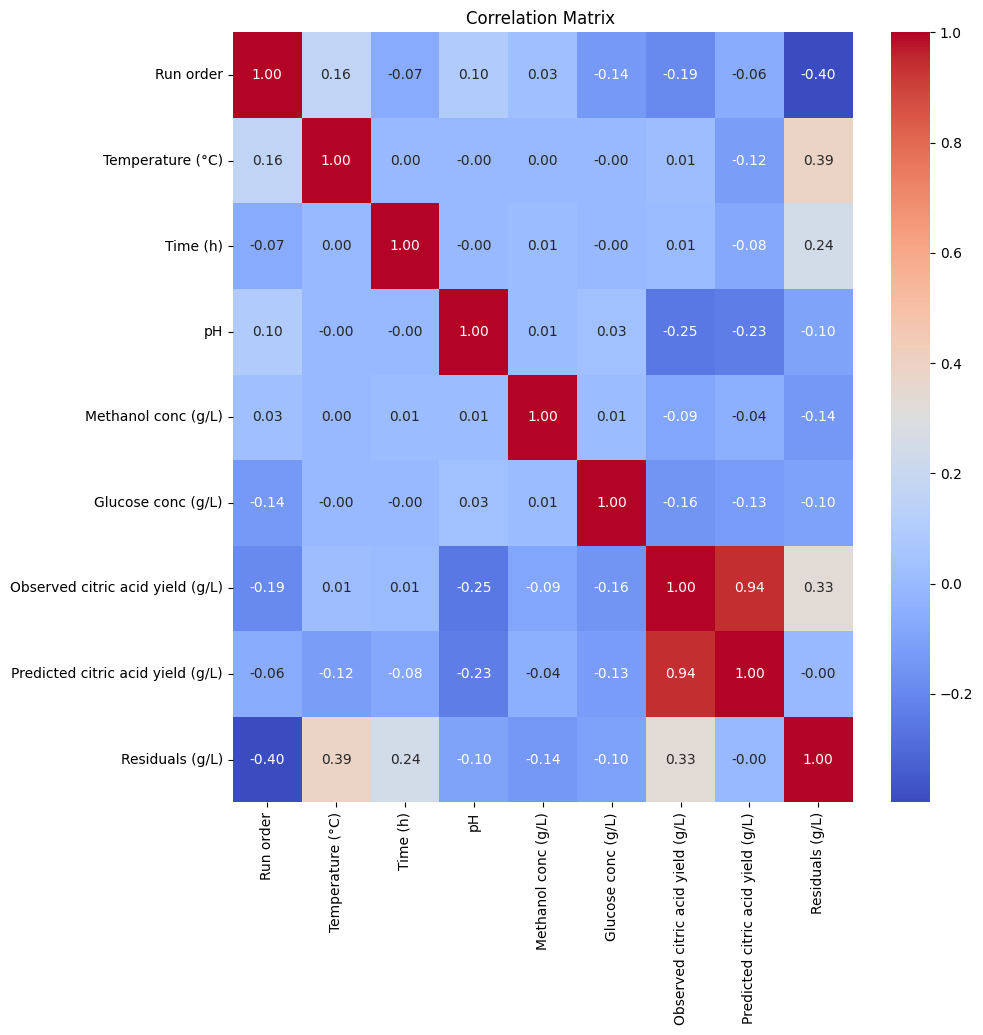

In [ ]:
import seaborn as sns
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix ')
plt.show()

From matrix , we can conclude that the important features for feature selection.

In [ ]:
X = X[['Run order','Temperature (°C)','pH','Glucose conc (g/L)','Methanol conc (g/L)']]

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_processed = scalar.fit_transform(X)
X_processed

array([[0.        , 0.25      , 0.        , 0.83333333, 0.14285714,
        0.33333333, 0.41436464, 0.57823129],
       [0.03846154, 0.5       , 0.3       , 1.        , 0.57142857,
        0.5       , 0.31123389, 0.58163265],
       [0.07692308, 0.5       , 0.3       , 0.5       , 0.57142857,
        1.        , 0.39042357, 0.71428571],
       [0.11538462, 0.5       , 1.        , 0.5       , 0.57142857,
        0.5       , 0.05156538, 0.62585034],
       [0.15384615, 0.5       , 0.2       , 0.5       , 0.57142857,
        0.5       , 0.03683241, 0.59183673],
       [0.19230769, 1.        , 0.3       , 0.5       , 0.57142857,
        0.5       , 0.57090239, 1.        ],
       [0.23076923, 0.25      , 0.7       , 0.33333333, 1.        ,
        0.83333333, 0.53222836, 0.65646259],
       [0.26923077, 0.25      , 0.        , 0.33333333, 1.        ,
        0.33333333, 0.5893186 , 0.49319728],
       [0.30769231, 0.25      , 0.        , 0.33333333, 0.14285714,
        0.83333333, 0.042357

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.5731637346052754)

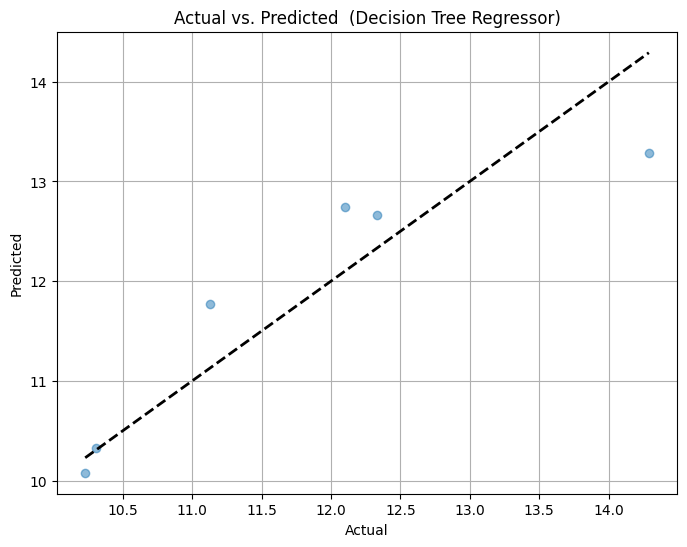

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted  (Decision Tree Regressor)")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()
#Ideally, the points should cluster closely around the diagonal line where actual and predicted values are equal.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.431717260012372)

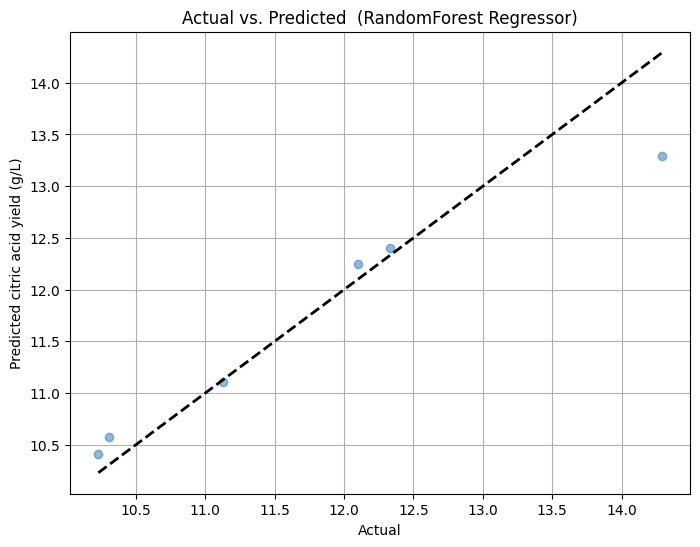

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted citric acid yield (g/L)")
plt.title("Actual vs. Predicted  (RandomForest Regressor)")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train a Linear Regression model
lin_reg = Ridge()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin_reg = lin_reg.predict(X_test)

# Evaluate the model
lin_reg_mse = mean_squared_error(y_test, y_pred_lin_reg)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_r2 = r2_score(y_test, y_pred_lin_reg)

print(f"Linear Regression RMSE: {lin_reg_rmse}")
print(f"Linear Regression R-squared: {lin_reg_r2}")

Linear Regression RMSE: 0.6334958093051494
Linear Regression R-squared: 0.7937890125553093


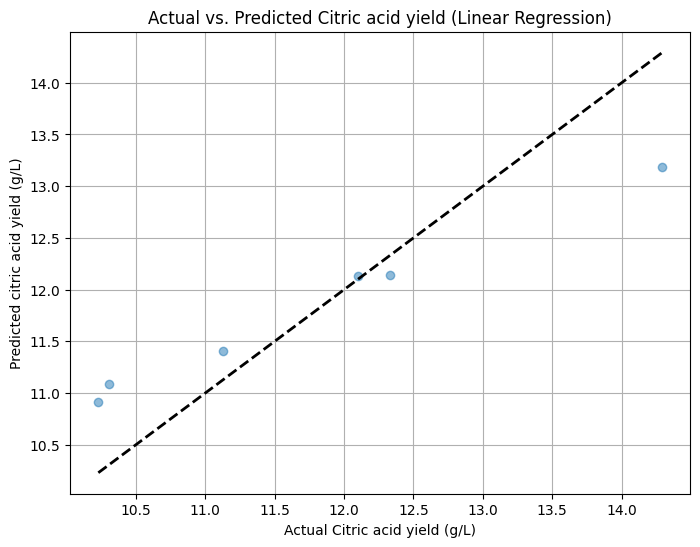

In [ ]:
y_pred_lin_reg = lin_reg.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin_reg, alpha=0.5)
plt.xlabel("Actual Citric acid yield (g/L)")
plt.ylabel("Predicted citric acid yield (g/L)")
plt.title("Actual vs. Predicted Citric acid yield (Linear Regression)")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Here is a comparison of the performance metrics for the trained models:

*   **Decision Tree Regressor:**
    *   RMSE: (0.5731637346052754)

*   **Random Forest Regressor:**
    *   RMSE: 0.431717260012372

*   **Linear Regression (Ridge):**
    *   RMSE: 0.6334958093051494

Based on the RMSE, the Random Forest Regressor appears to have the best performance on the test set among the three models.

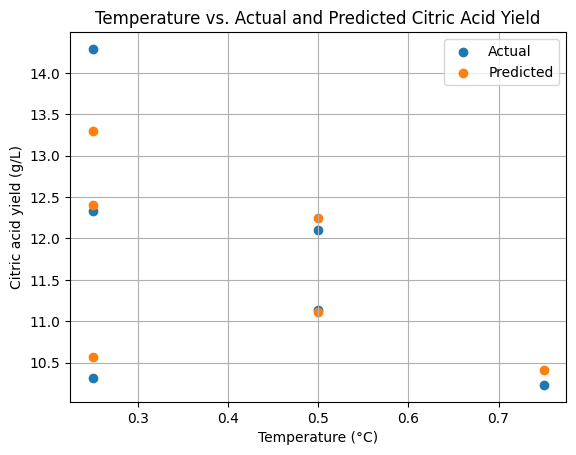

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 1] , y_test, label='Actual')
plt.scatter(X_test[:, 1] , y_pred, label='Predicted')
plt.xlabel("Temperature (°C)")
plt.ylabel("Citric acid yield (g/L)")
plt.title("Temperature vs. Actual and Predicted Citric Acid Yield")
plt.legend()
plt.grid(True)
plt.show()